Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Khakharova Taisiya"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = self.yk.shape[0]
        
        def basis_poly(x, j):
          l = 1
          for i in range(n):
           if i == j:
             continue
           else:
               l *= (x - self.xk[i]) / (self.xk[j] - self.xk[i])
          return l

        value = 0
        for k in range(n):
          value += self.yk[k] * basis_poly(x, k)
        return value  

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


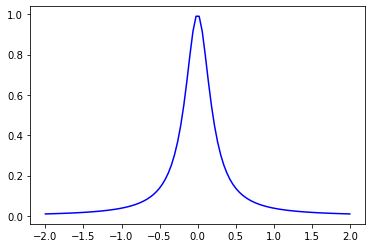

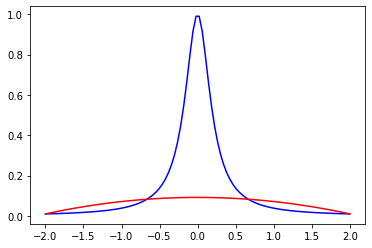

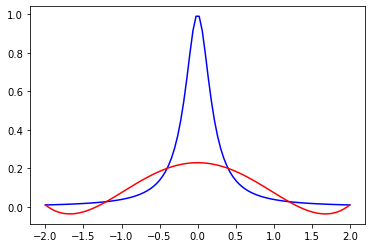

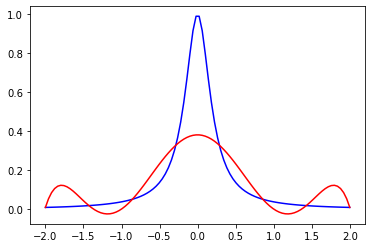

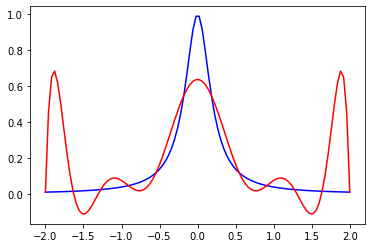

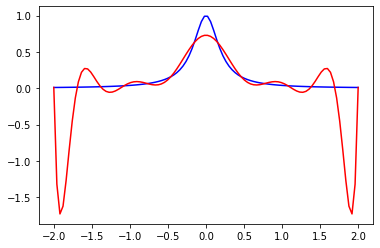

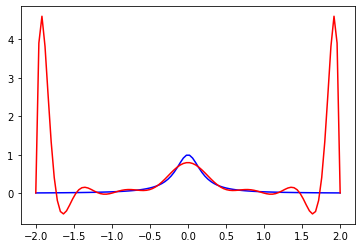

In [4]:
arr = [3, 5, 7, 11, 13, 15]
xx = np.linspace(-2, 2, 100)
yy = runge_func(xx)
plt.plot(xx, yy, "b")
for degree in arr:
  lagr_xx_input = np.linspace(-2, 2, degree+1)
  lagr_yy_input = runge_func(lagr_xx_input)

  lagr = LagrangeInterpolator(lagr_xx_input, lagr_yy_input) 
  lagr_yy_output = np.array([lagr(xval) for xval in xx])
  plt.figure()
  plt.plot(xx, yy, "b")
  plt.plot(xx, lagr_yy_output, "r")
  plt.show

Теперь будем делать с помощью узлов Чебышева.

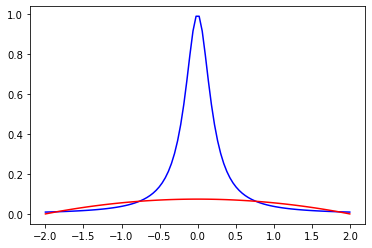

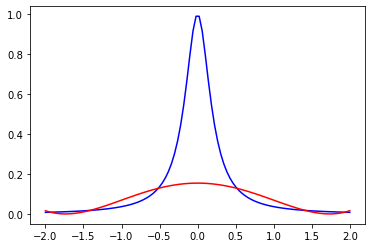

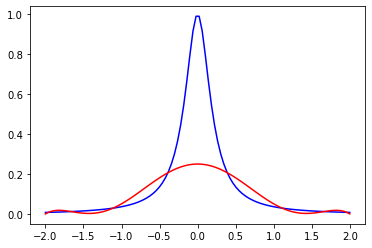

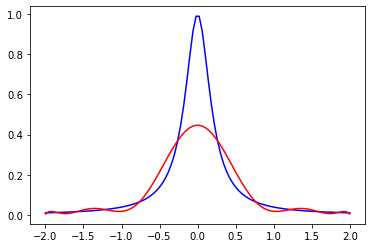

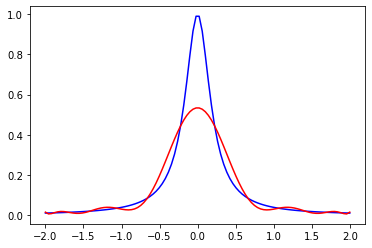

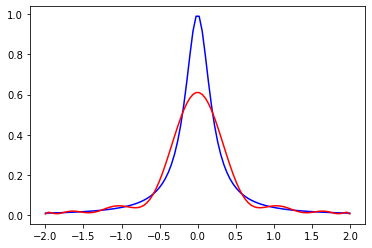

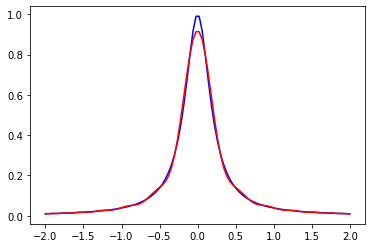

In [5]:
a = -2
b = 2
arr = [3, 5, 7, 11, 13, 15, 31]
for n in arr:
  x = np.array([0.5 * (a + b) + 0.5 * (b - a) * np.cos(((2*k - 1) * np.pi) / (2*(n+1))) for k in range(1, n+2)])
  y = runge_func(x)
  lagr = LagrangeInterpolator(x, y) 
  lagr_y_output = np.array([lagr(xval) for xval in xx])
  plt.figure()
  plt.plot(xx, yy, "b")
  plt.plot(xx, lagr_y_output, "r")
  plt.show
